In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 

In [2]:
import sys
reload(sys)
sys.setdefaultencoding('latin-1')

In [3]:
sns.set()
sns.set(rc={"figure.figsize": (8, 6)})
sns.set_palette("muted")

In [4]:
%matplotlib inline 

In [5]:
df = pd.read_csv('./blocket_cars.csv', encoding='utf-8')

In [6]:
df.head() 

,_id,brand,butik_url,city,color,county,date_announced,date_collected,description,emissions,...,mileage,model,model_year,price,price_old,rear_wheels,title,type,url,year
0,574521095c72dbf51d28efdd,Ford,NaN,Lund,Grå,Lund,2016-05-24 23:42:00,2016-05-25 05:50:33.389419,"SVENSKSÅLD FORD MONDEO 2009, en ägare, säljes ...",NaN,...,13000-13499,BA7 MONDEO MONDEO,2009,60000,70000.0,Tvåhjulsdriven,Ford Mondeo 2.0 Flexifuel Kombi -09,Kombi,https://www.blocket.se/lund/Ford_Mondeo_2_0_Fl...,2008
1,5745210c5c72dbf51d28efde,Volkswagen,NaN,Uppsala,Mörkgrå,Uppsala,2016-05-24 22:07:00,2016-05-25 05:50:36.231908,"Bensin/etanol, Bilen levereras nybesiktigad oc...",NaN,...,12000-12499,"VW GOLF VAR. 1,6",2008,59900,NaN,Tvåhjulsdriven,Volkswagen Golf 1.6 MultiFuel E85 (102hk) Tr -08,Kombi,https://www.blocket.se/uppsala/Volkswagen_Golf...,2008
2,5745210e5c72dbf51d28efdf,Volvo,NaN,Mariestad,Ljusgrå,Skaraborg,2016-05-24 22:07:00,2016-05-25 05:50:38.175930,"Pigg rolig bil att köra, går billigt. Volvo C3...",NaN,...,19000-19499,M + C30,2007,49000,NaN,Tvåhjulsdriven,Volvo C30 2.0 diesel Momentum -07,Halvkombi,https://www.blocket.se/skaraborg/Volvo_C30_2_0...,2007
3,5745210e5c72dbf51d28efe0,Volvo,NaN,Örebro,Svart,Örebro,2016-05-24 22:07:00,2016-05-25 05:50:38.938642,"Info: Svart met, ABS bromsar,\nACC/Klimatanläg...",NaN,...,7500-7999,M + C30,2008,59500,NaN,Tvåhjulsdriven,Volvo C30 1.8 Flexifuel -08,Halvkombi,https://www.blocket.se/orebro/Volvo_C30_1_8_Fl...,2007
4,5745210f5c72dbf51d28efe1,Toyota,NaN,"Malmö, Centralt Söder",Mörkblå,Malmö,2016-05-24 22:07:00,2016-05-25 05:50:39.459649,Ett tillfälle att äga denna fantastiska bil so...,NaN,...,18000-18499,AVENSIS,2003,55000,NaN,Tvåhjulsdriven,"Unik Toyota Avensis 2.0, GPS DVD BLUETOOTH -03",Sedan,https://www.blocket.se/malmo/Unik_Toyota_Avens...,2003


**Insights to extract:**
   * Time based:
      * what time of the day 
      * which day of the week 
      * values based on the above (as hue) 
   * location
   * specfication of the car 
      * type 
      * gearbox 
      * color 
      * model year 
      * milleage 
      * price 
        

View object types

In [7]:
df.dtypes

_id                object
brand              object
butik_url          object
city               object
color              object
county             object
date_announced     object
date_collected     object
description        object
emissions         float64
fuel               object
gearbox            object
horse_power         int64
in_traffic         object
is_available         bool
mileage            object
model              object
model_year         object
price               int64
price_old         float64
rear_wheels        object
title              object
type               object
url                object
year               object
dtype: object

In [8]:
# tmp = pd.to_datetime(df.date_announced, format='%Y-%m-%d- %H:%M:%S')
# df[df.date_announced == 'None']

In [9]:
df.shape 

(17586, 25)

In [10]:
# replace string 'None' with np.NaNs 
df.replace('None', pd.np.nan, inplace=True)

In [11]:
# df.date_announced.head()

In [12]:
df.date_announced.dropna().shape, df.date_announced.shape

((16226,), (17586,))

In [13]:
df.date_announced = pd.to_datetime(df.date_announced, errors='ignore')
df.date_collected = pd.to_datetime(df.date_collected, errors='ignore')

I have collected the data in two differennt ocasions.

In [14]:
d_collected = df.date_collected.groupby(df.date_collected.dt.date).count()
d_collected

date_collected
2016-05-25    8543
2016-08-05    9043
Name: date_collected, dtype: int64

There is also another field called `date_announced` which is the date the advert published on the website. Some rows are missing this field, probably beacause of exceptions during data collection. We can extract some insights from this columns, so let's continue exploring.

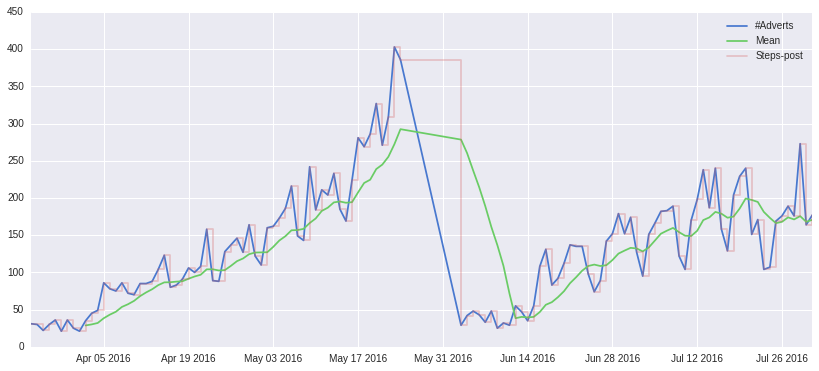

In [15]:
by_date = df.groupby(df.date_announced.dt.date)
f, ax = plt.subplots(figsize=(14, 6))
ax.plot(by_date.size(), label='#Adverts')
ax.plot(pd.rolling_mean(by_date.size(), 10), label='Mean')
ax.plot(by_date.size(), drawstyle='steps-post', label='Steps-post', alpha=0.3)
plt.legend()

As we can see from the plot the adverts are distriuted in two periods and increasing over time more or less. This is because I collected the data in two ocasions and old adverts relative to data collection dates are removed from the site. 

We can also check what time of the day or which day of the week the adverts are announced. Hopefully we can see a more realistic distribution since the day and time are not affected by data collection frequency, at least for short time units like hour and minute. 

In [16]:
by_date.size().head()

date_announced
2016-03-24    31
2016-03-25    30
2016-03-26    22
2016-03-27    30
2016-03-28    36
dtype: int64

In [17]:
by_day = df.groupby(df.date_announced.dt.dayofweek)

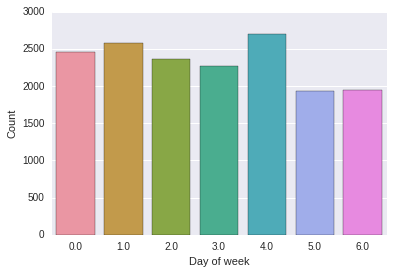

In [18]:
g = sns.barplot(x='date_announced',  y='count', data=by_day.size().reset_index().rename(columns={0: 'count'}))
g.set_xlabel('Day of week')
g.set_ylabel('Count')

In [19]:
by_hour = df.groupby(df.date_announced.dt.hour)

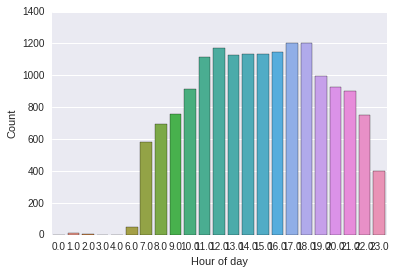

In [20]:
g = sns.barplot(x='date_announced',  y='count', data=by_hour.size().reset_index().rename(columns={0: 'count'}))
g.set_xlabel('Hour of day')
g.set_ylabel('Count')

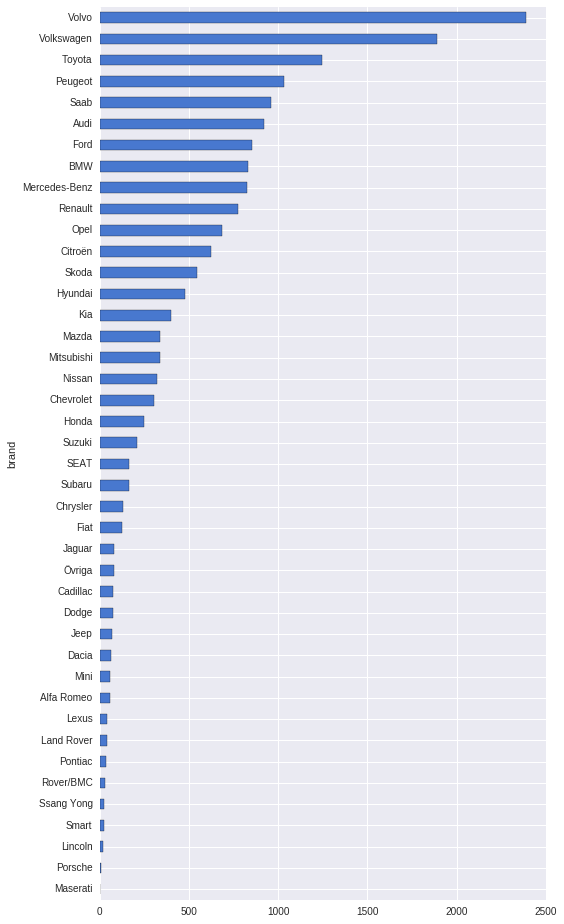

In [24]:
df.groupby('brand').size().sort_values().plot(kind='barh', figsize=(8, 16))

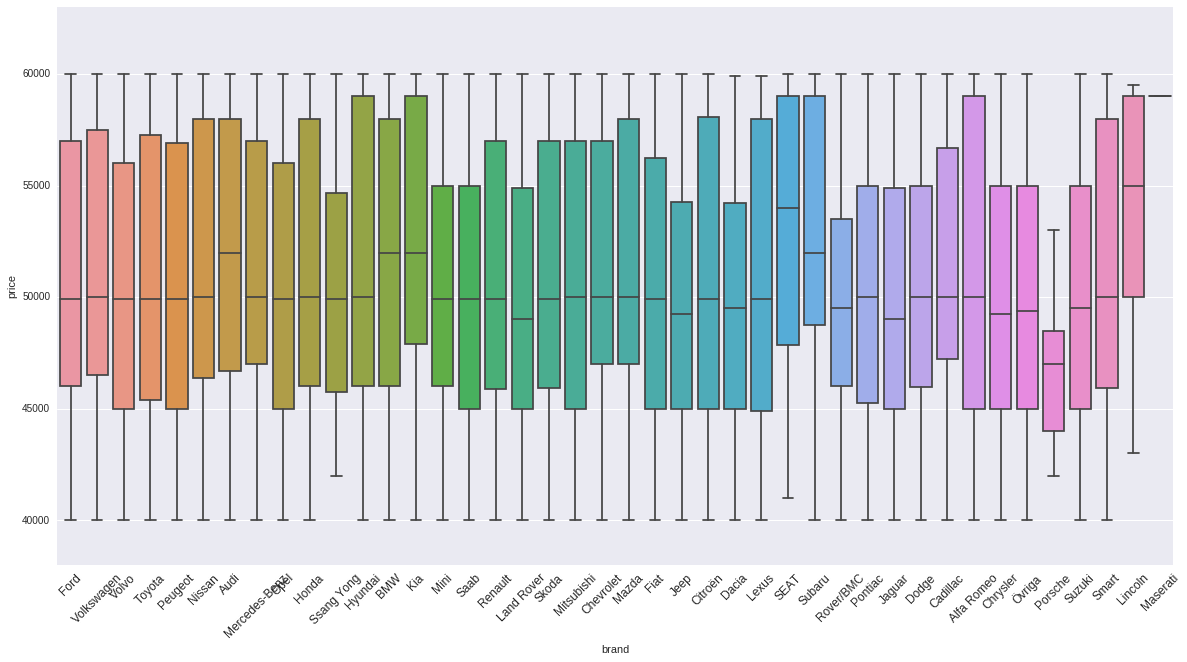

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
g = sns.boxplot(x='brand', y='price', data=df, ax=ax)
plt.ylim(df.price.min() * 0.95, df.price.max()*1.05)
for item in g.get_xticklabels():
    item.set_rotation(45)
    item.set_fontsize(12)

In [26]:
df.price.describe()

count    17586.000000
mean     51270.730524
std       6098.585874
min      40000.000000
25%      45500.000000
50%      49900.000000
75%      57000.000000
max      60000.000000
Name: price, dtype: float64

In [27]:
df[df.brand == 'Porsche'].price

407      48000
1514     53000
2337     44000
4281     47000
6144     42000
11348    49000
12845    43000
12864    46000
16850    48500
Name: price, dtype: int64

In [28]:
# g = sns.FacetGrid(df, col='brand', col_wrap=7, size=2)
# g.map(sns.countplot, 'city')

In [29]:
# sns.factorplot(x='brand', y='model_year', data=df, kind='swarm',
#               hue='gearbox', col='fuel')

In [30]:
# from matplotlib import rcParams
# rcParams['text.latex.unicode']=True

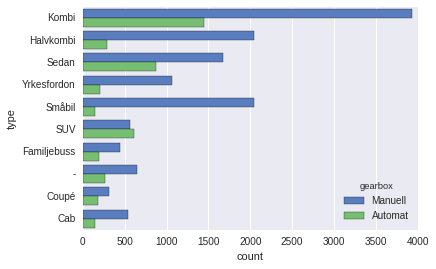

In [31]:
sns.countplot(y='type', data=df, hue='gearbox')

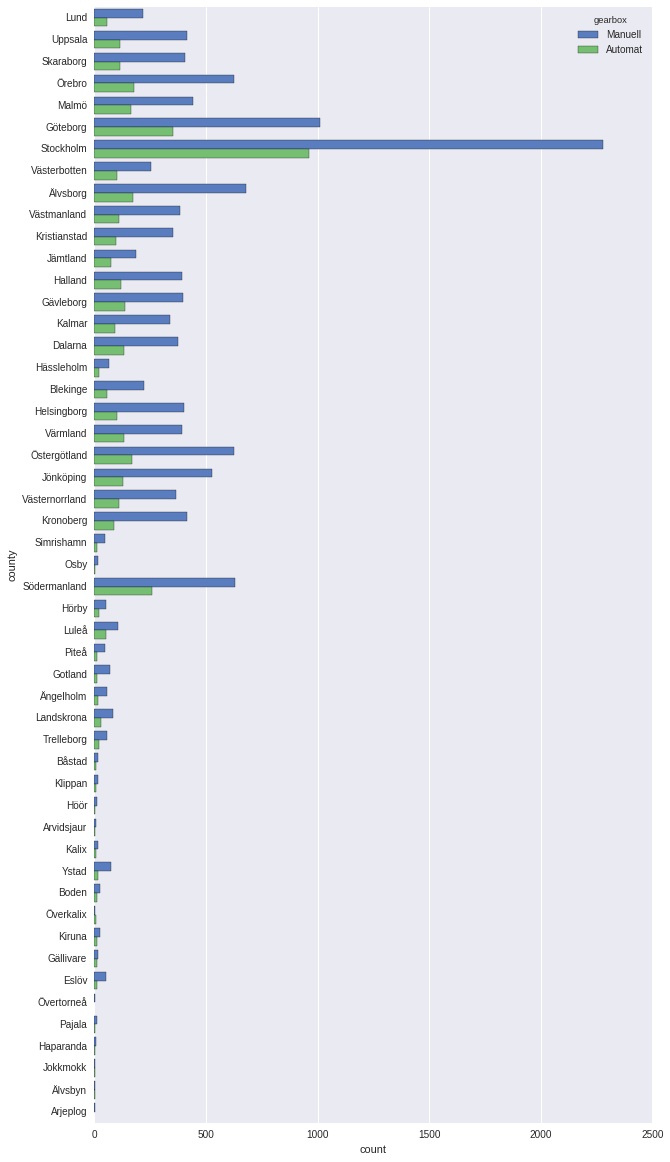

In [32]:
# also for city 
fig, ax = plt.subplots(figsize=(10, 20))
sns.countplot(y='county', hue='gearbox', data=df, ax=ax)

In [33]:
years = pd.DataFrame(df.year.value_counts().sort_index())
years.shape

(68, 1)

In [34]:
# pd.DatetimeIndex(years.index[1:])

In [35]:
years.head()

,year
-,1
1943,1
1950,3
1951,1
1952,2


In [36]:
years['new_year'] = years.index.map(lambda x: 'before 2000' if(x <= '2000')  else x)

In [37]:
years = years.groupby('new_year').sum().reset_index()

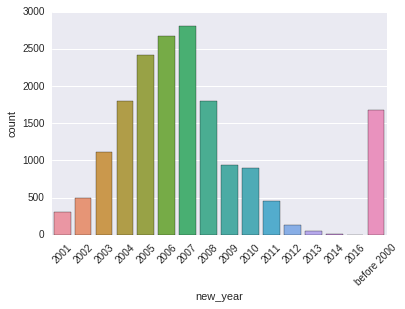

In [38]:
g = sns.barplot(x='new_year', y='year', data=years)
g.set_ylabel('count')
_ = plt.xticks(rotation=45)

In [39]:
# years.plot(kind='bar', figsize=(10, 6))

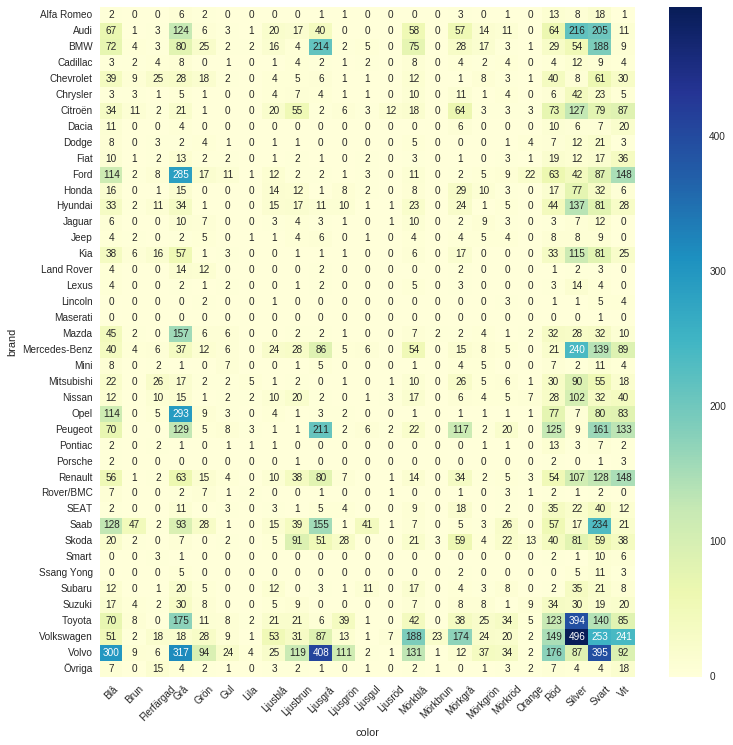

In [40]:
brand_color = pd.crosstab(df.brand, df.color)
fig, ax = plt.subplots(figsize=(12, 12))
g = sns.heatmap(brand_color, annot=True, fmt='d', ax=ax, cmap="YlGnBu")
for item in g.get_xticklabels():
    item.set_rotation(45)

we can even map the Swedish color names to english and plot again. 

In [41]:
# print(', '.join(unicode(i) for i in df.color.unique()))
colors_se = u"Grå, Mörkgrå, Ljusgrå, Svart, Mörkblå, Vit, Silver, Blå, Röd, Ljusgrön, Mörkgrön, Ljusröd, Mörkröd, Grön, Gul, Flerfärgad, Ljusbrun, Brun, Ljusblå, Ljusgul, Lila, Orange, Mörkbrun"
colors_en = "Gray, Dark Gray, Light Gray, Black, Dark Blue, White, Silver, Blue, Red, Light Green, Dark Green, Pink, Dark Red, Green, Yellow, Multi Colored, Light brown, Brown, Light Blue, Light Yellow, Purple, Orange, Dark Brown"
colors_se = [i.strip() for i in colors_se.split(',')]
colors_en = [i.strip() for i in colors_en.split(',')]
colors_se_to_en = dict(zip(colors_se, colors_en))

In [42]:
colors_se_to_en

{u'Bl\xe5': 'Blue',
 u'Brun': 'Brown',
 u'Flerf\xe4rgad': 'Multi Colored',
 u'Gr\xe5': 'Gray',
 u'Gr\xf6n': 'Green',
 u'Gul': 'Yellow',
 u'Lila': 'Purple',
 u'Ljusbl\xe5': 'Light Blue',
 u'Ljusbrun': 'Light brown',
 u'Ljusgr\xe5': 'Light Gray',
 u'Ljusgr\xf6n': 'Light Green',
 u'Ljusgul': 'Light Yellow',
 u'Ljusr\xf6d': 'Pink',
 u'M\xf6rkbl\xe5': 'Dark Blue',
 u'M\xf6rkbrun': 'Dark Brown',
 u'M\xf6rkgr\xe5': 'Dark Gray',
 u'M\xf6rkgr\xf6n': 'Dark Green',
 u'M\xf6rkr\xf6d': 'Dark Red',
 u'Orange': 'Orange',
 u'R\xf6d': 'Red',
 u'Silver': 'Silver',
 u'Svart': 'Black',
 u'Vit': 'White'}

In [43]:
df['color_en'] = df.color.map(lambda x: colors_se_to_en.get(x, x))

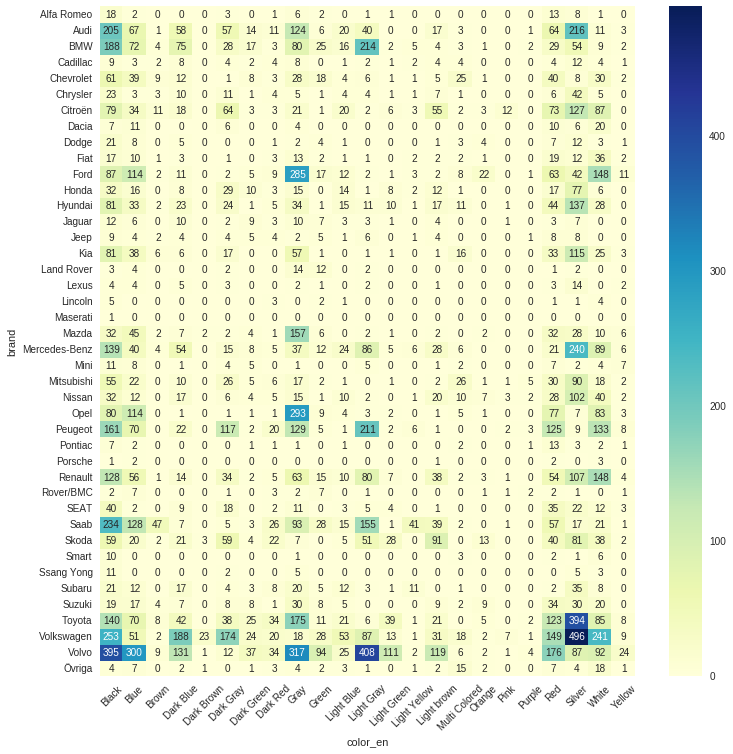

In [44]:
brand_color = pd.crosstab(df.brand, df.color_en)
fig, ax = plt.subplots(figsize=(12, 12))
g = sns.heatmap(brand_color, annot=True, fmt='d', ax=ax, cmap="YlGnBu")
for item in g.get_xticklabels():
    item.set_rotation(45)

In [45]:
by_county = df.groupby('county')

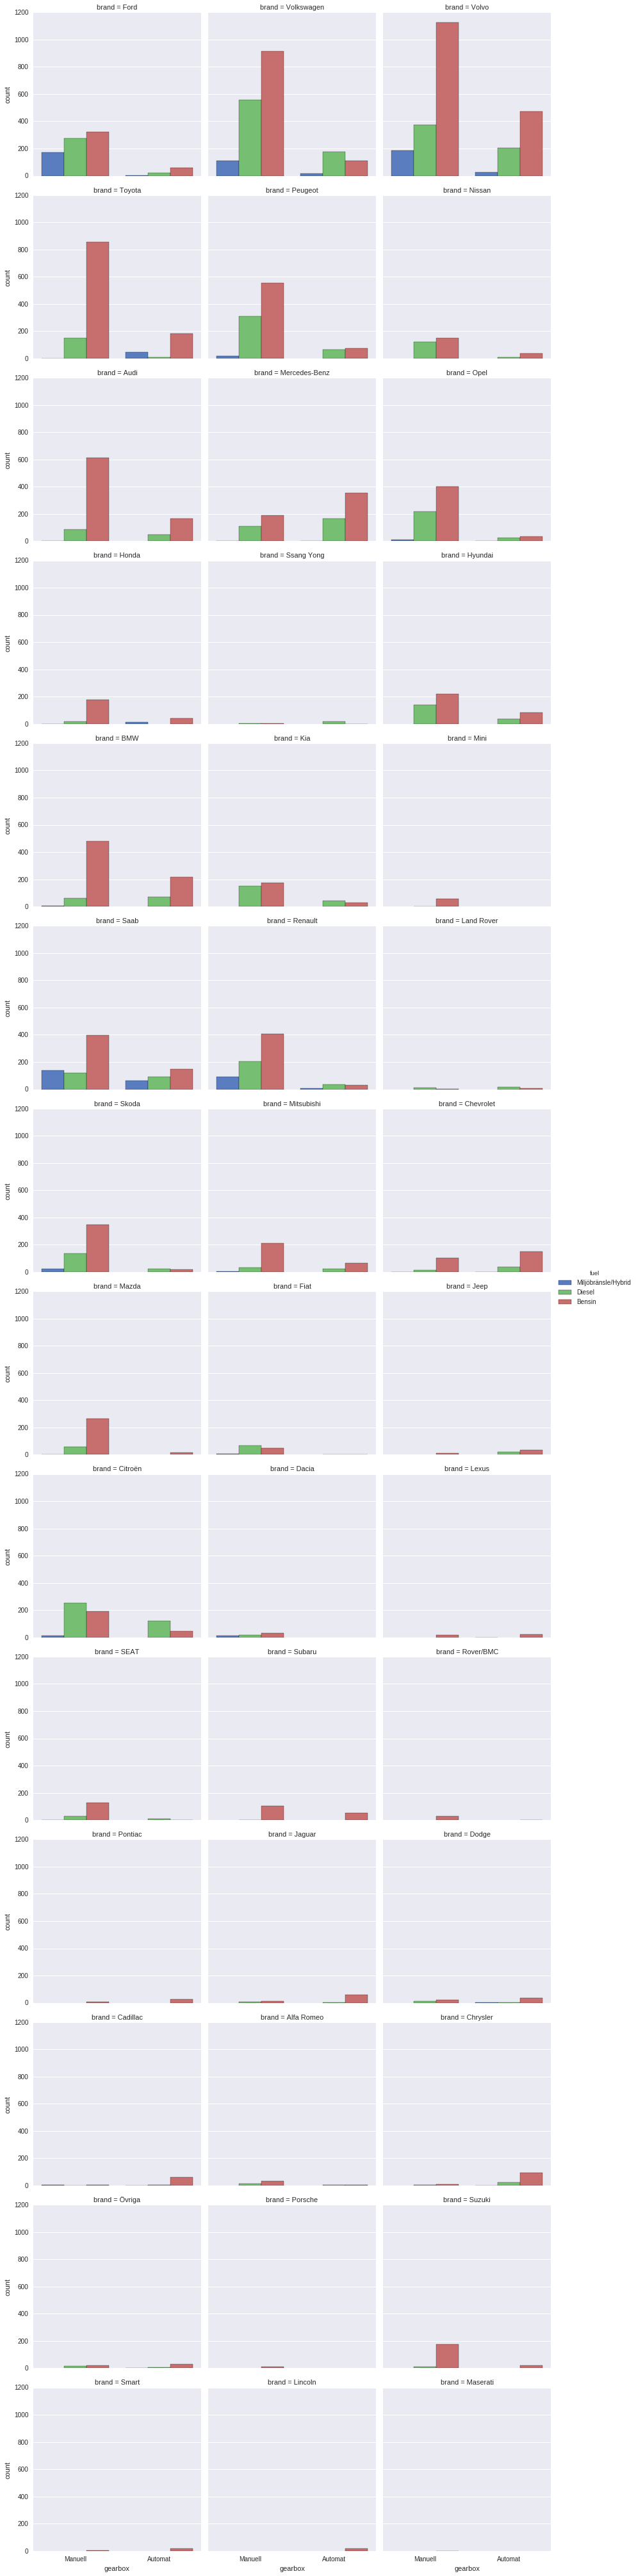

In [46]:
sns.factorplot(x='gearbox', data=df, col='brand', col_wrap=3, kind='count', hue='fuel')

In [47]:
# To be continued..
# by_county.price.nlargest(2).reset_index()
# draw a facetgrid 